## Classification Problem 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [3]:
df = pd.read_csv("D:/Python DataScience/Feature Selection/santander-train.csv",nrows=20000)

In [8]:
X = df.drop(['TARGET'],axis=1)
y = df['TARGET']

In [9]:
X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [10]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [11]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [12]:
X_train_T.duplicated().sum()

18

In [13]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [14]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### Calculation Mutual Information

Mutual information is a measure of the dependence between the random variables is always symmetric and non negative.

It is zero only if the variables are independent.

In [16]:
mi = mutual_info_classif(X_train_unique,y_train)

In [17]:
len(mi)

227

In [18]:
mi

array([2.72074541e-03, 0.00000000e+00, 1.40329993e-02, 0.00000000e+00,
       0.00000000e+00, 2.77738709e-03, 1.50155689e-03, 4.30980883e-05,
       0.00000000e+00, 5.88856658e-04, 1.15089821e-03, 0.00000000e+00,
       9.98143918e-04, 0.00000000e+00, 2.79090116e-03, 8.10439476e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.56477346e-04, 5.64599351e-03, 1.05204906e-02, 3.12968184e-03,
       0.00000000e+00, 0.00000000e+00, 1.43623679e-03, 3.10522253e-03,
       6.03929363e-04, 4.44695528e-03, 0.00000000e+00, 4.80090325e-04,
       2.90599606e-04, 0.00000000e+00, 1.07254603e-03, 0.00000000e+00,
       0.00000000e+00, 2.20428604e-03, 1.19199591e-02, 1.19082527e-03,
       0.00000000e+00, 5.24518515e-03, 3.72657841e-03, 0.00000000e+00,
       2.77178173e-03, 9.66988321e-03, 5.43758870e-03, 8.69688306e-03,
       0.00000000e+00, 1.01255271e-03, 0.00000000e+00, 0.00000000e+00,
       1.75618251e-03, 0.00000000e+00, 2.40409794e-03, 6.47517472e-04,
      

In [20]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns
mi.sort_values(ascending = False,inplace=True)

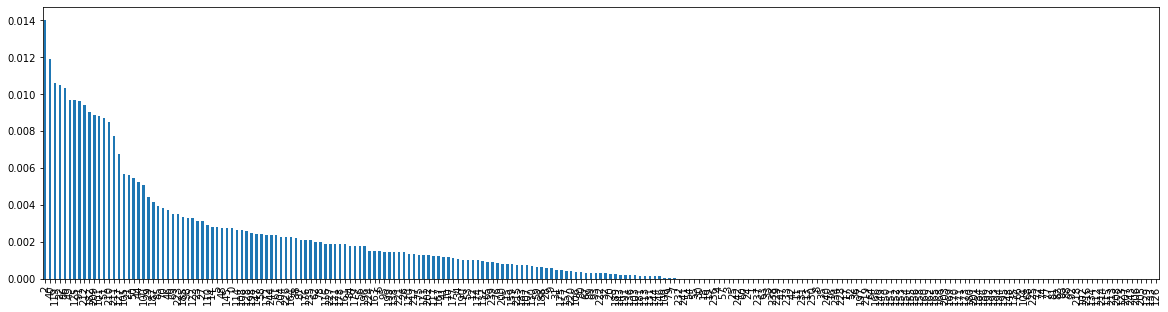

In [21]:
mi.plot.bar(figsize = (20,5))

In [22]:
sel = SelectPercentile(mutual_info_classif,percentile=10).fit(X_train_unique,y_train)
X_train_unique.columns[sel.get_support()]


Int64Index([  2,  22,  40,  46,  49,  50,  51,  86,  91,  95,  98, 101, 105,
            114, 119, 125, 127, 182, 209, 210, 211, 212, 215],
           dtype='int64')

In [23]:
len(X_train_unique.columns[sel.get_support()])

23

In [50]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)


In [51]:
X_train_mi.shape,X_test_mi.shape

((16000, 23), (4000, 23))

In [42]:
## MODEL BUILDING 

def run_randomForest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


In [52]:
%%time
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

0.95775
Wall time: 994 ms


In [53]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

0.9585
Wall time: 3.15 s


 ## Mutual Information Gain in Regression

In [55]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
boston = load_boston()

In [68]:
X = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [71]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [72]:
y = boston.target

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [75]:
mi = mutual_info_regression(X_train,y_train)
mi = pd.Series(mi)
mi.index = (X_train.columns)
mi.sort_values(ascending = False,inplace=True)

In [76]:
mi

LSTAT      0.679584
RM         0.560434
INDUS      0.519207
PTRATIO    0.480658
NOX        0.451417
TAX        0.388789
CRIM       0.362992
AGE        0.344973
DIS        0.319539
RAD        0.227642
ZN         0.202417
B          0.155968
CHAS       0.012500
dtype: float64

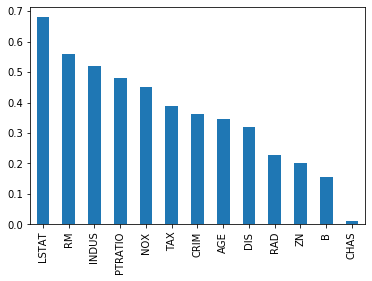

In [77]:
mi.plot.bar()

In [78]:
sel = SelectKBest(mutual_info_regression,k=9).fit(X_train,y_train)

In [79]:
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [80]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [81]:
r2_score(y_test,y_pred)

0.5892223849182507

In [82]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.783509315085135

In [83]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [85]:
model = LinearRegression()
model.fit(X_train_sel,y_train)
y_pred = model.predict(X_test_sel)

In [86]:
r2_score(y_test,y_pred)

0.531712760696157

In [87]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.175103151293751